In [21]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Dataset_5971.csv")
df.head()

,LABEL,TEXT,URL,EMAIL,PHONE
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,No,No,No
1,ham,What's up? Do you want me to come online? If y...,No,No,No
2,ham,So u workin overtime nigpun?,No,No,No
3,ham,"Also sir, i sent you an email about how to log...",No,No,No
4,Smishing,Please Stay At Home. To encourage the notion o...,No,No,No


In [ ]:
df.drop(columns=["PHONE"], inplace=True)
df.drop(columns=["URL"], inplace=True)
df.drop(columns=["EMAIL"], inplace=True)


In [15]:
df['LABEL'].unique()

array(['ham', 'Smishing', 'spam', 'Spam', 'smishing'], dtype=object)

In [17]:
df['LABEL'] = df['LABEL'].replace(['Smishing', 'spam', 'Spam', 'smishing'], 'smishing')
df['LABEL'].unique()

array(['ham', 'smishing'], dtype=object)

In [18]:
df.head()

,LABEL,TEXT
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,ham,What's up? Do you want me to come online? If y...
2,ham,So u workin overtime nigpun?
3,ham,"Also sir, i sent you an email about how to log..."
4,smishing,Please Stay At Home. To encourage the notion o...


In [19]:
df.describe()

,LABEL,TEXT
count,5971,5971
unique,2,5949
top,ham,The greatest test of courage on earth is to be...
freq,4844,2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5971 entries, 0 to 5970
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   LABEL   5971 non-null   object
 1   TEXT    5971 non-null   object
dtypes: object(2)
memory usage: 93.4+ KB


([<matplotlib.patches.Wedge at 0x2e302c77010>,
 [Text(-0.9122180989274619, 0.6147016674689989, 'ham'),
  Text(0.9122180701511993, -0.6147017101730091, 'smishing')],
 [Text(-0.4975735085058882, 0.33529181861945395, '81.1%'),
  Text(0.49757349280974494, -0.3352918419125504, '18.9%')])

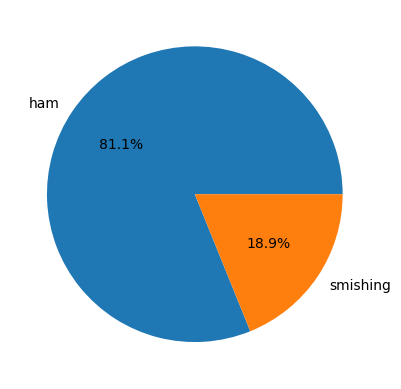

In [22]:
plt.pie(df['LABEL'].value_counts(), labels=df['LABEL'].unique(), autopct='%1.1f%%')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
df['LABEL_NUM'] = df['LABEL'].map({'ham': 0, 'smishing': 1})

In [27]:
X = df['TEXT']
y = df['LABEL_NUM']

In [28]:
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
X_tfidf = vectorizer.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.25, random_state=42, stratify=y
)

In [30]:
model = MultinomialNB()


model.fit(X_train, y_train)
print("--- Model Training Complete ---")
print("\n")

--- Model Training Complete ---




In [32]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Model Evaluation on Test Data ---")
print(f"Accuracy: {accuracy:.4f}")

--- Model Evaluation on Test Data ---
Accuracy: 0.9699


In [34]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['ham', 'smishing']))


Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1211
    smishing       1.00      0.84      0.91       282

    accuracy                           0.97      1493
   macro avg       0.98      0.92      0.95      1493
weighted avg       0.97      0.97      0.97      1493



In [35]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n")


Confusion Matrix:
[[1211    0]
 [  45  237]]




In [36]:
def predict_message(message):
    """
    Takes a text message as input, vectorizes it, and predicts its class.
    """
    # We must use the SAME vectorizer that was used for training.
    # The transform method converts the new text into the numerical format.
    message_tfidf = vectorizer.transform([message])
    
    # Predict the label (0 or 1)
    prediction_num = model.predict(message_tfidf)[0]
    
    # Predict the probability of each class
    prediction_proba = model.predict_proba(message_tfidf)[0]

    # Map the numerical label back to the text label
    if prediction_num == 0:
        return f"'ham' (Probability: {prediction_proba[0]:.2f})"
    else:
        return f"'smishing' (Probability: {prediction_proba[1]:.2f})"


In [67]:
new_message_1 = "Neal lost his idcard, donate neal 2000$ " 
new_message_2 = "Congratulations! You've been selected to win a $1,000 gift card for Walmart! Click the link below to claim your prize: www.bamboo.com"
new_message_3 = "Click here to claim your free iPhone! www.freeiphones.com"
new_message_4 = "Dear Tushar,Your bank account has been temporarily suspended due to suspicious activity. \nPlease verify your identity immediately by clicking the link below: http://secure-banking-update.com/Tushar \nFailure to act within 24 hours may result in permanent account closure."
new_message_5 = "Hello I am Hacker give me 100S$"







print(f"Message: '{new_message_1}'")
print(f"Prediction: {predict_message(new_message_1)}")
print("-" * 20)
print(f"Message: '{new_message_2}'")
print(f"Prediction: {predict_message(new_message_2)}")
print("-" * 20)
print(f"Message: '{new_message_3}'")
print(f"Prediction: {predict_message(new_message_3)}")
print("-" * 20)
print(f"Message: '{new_message_4}'")
print(f"Prediction: {predict_message(new_message_4)}")
print("-" * 20)
print(f"Message: '{new_message_5}'")
print(f"Prediction: {predict_message(new_message_5)}")

Message: 'Neal lost his idcard, donate neal 2000$ '
Prediction: 'ham' (Probability: 0.58)
--------------------
Message: 'Congratulations! You've been selected to win a $1,000 gift card for Walmart! Click the link below to claim your prize: www.bamboo.com'
Prediction: 'smishing' (Probability: 0.98)
--------------------
Message: 'Click here to claim your free iPhone! www.freeiphones.com'
Prediction: 'smishing' (Probability: 0.93)
--------------------
Message: 'Dear Tushar,Your bank account has been temporarily suspended due to suspicious activity. 
Please verify your identity immediately by clicking the link below: http://secure-banking-update.com/Tushar 
Failure to act within 24 hours may result in permanent account closure.'
Prediction: 'smishing' (Probability: 0.86)
--------------------
Message: 'Hello I am Hacker give me 100S$'
Prediction: 'ham' (Probability: 0.96)


In [50]:
import pickle
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Save the trained model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)